__Statistical Learning in High Dimension__
<br>_Professor: M. Hebiri_
<br>_Student: Viktoriia Oliinyk_
### TP1. Density estimation
#### Exercise 1. Simulated data
1.1 _Data simulation_
<br>We simulate the sample from the mixture of two distribution: the normal distribution centered at -1.5 with standard deviation $ \sqrt2 $ and the standard uniform distribution. 
We sample 50 observations from each distribution and concatenate the data using a popular python library numpy. 
<br> We call the resulting vector __X__.
<br> _Remark_: We follow the notation used in the lectures, implying $X_{norm}\sim N(\mu=-1.5,\sigma^2=2$)

In [2]:
import numpy as np
X_norm = np.random.normal(-1.5, np.sqrt(2), 50)
X_unif = np.random.uniform(0, 1, 50)
X = np.concatenate([X_norm, X_unif])

1.2 _Density estimation_
<br> We assume now that the elements of our simulated vector __X__ are i.i.d. realizations of the random variable $ X $ with an unkonwn distribution law. 
<br> Our goal is to estimate this unknown density of $ X $. In this respect, we suggest to use kernel density estimation approach.
<br>a. Let us first take a look at the histogram of our sample __X__ to get the flavour of the data. To draw the histogram, we used matplotlib library.

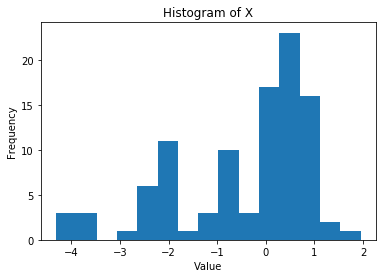

In [3]:
import matplotlib.pyplot as plt
plt.hist(X,bins=15)
plt.title("Histogram of X")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

We can see two peaks on the histogram. This corresponds to the mixed (and bimodal) nature of our sample. The  highest peak arises from the overlap of two distributions. Now, we know what to expect from the density.

<br>b. We will build the density estimators using two kernels, __triangular__ and __gaussian__.
<br>We are building a function $ \hat{f}_{n,h}(x)=\frac{1}{nh}\sum\limits_{i=1}^{n} K\Big(\frac{X_i-x}{h}\Big)$, where $n$ is a sample size, $h$ is a bandwidth tunning parameter, and $ K(\mathord{\cdot}) $ is a kernel of our choice.
<br>We present the selected kernels below.
1. Triangular kernel: $K(u) = (1-|u|) \mathbb{1} \{|u|\leq 1\}$
2. Gaussian kernel: $K(u) = \frac{1}{\sqrt{2\pi}}\exp{\frac{-u^2}{2}}$

<br> For the moment, we will choose the bandwidth parameter $h$ manually in such a way that the visual result of density plot is acceptable. We will try different values to resolve bias/variance tradeoff by eye.

<br> We created the grid of 10,000 x-values 
```python
grid_x = np.linspace(np.min(X)-2, np.max(X)+2, num = 10**4)
```
 and built the functions $ \hat{f}_{rect}(x) $ and $ \hat{f}_{gauss}(x)$ which calculate $ \hat{f}_{n,h}(x)$ with corresponding kernels described above. 
 
 <br> _Remark_: In this project the code is written in a "pythonic" way, i.e. whenever it is possible, vector/matrix approach is used. The trick here is that these functions accept vectors as arguments, and then Python implement so-called "broadcasting" of variables. As a result, we can feed the whole grid of x's to the function, and get a vector of values of $\hat{f}_{n,h}(x)$ at all points of the grid at once as the output. This speeds up the code significantly.



In [4]:
# b. Kernel estimators
X = X.reshape((len(X), 1))
grid_x = np.linspace(np.min(X)-2, np.max(X)+2, num = 10**4)
grid_x = grid_x.reshape((1, len(grid_x)))
n = len(X)
# Estimator with triangular kernel
def f_tr(x):
    K_tr = (1-np.abs((X - x)/h))*(np.abs((X - x)/h) < 1)
    return 1/(n*h)*np.sum(K_tr, axis = 0)
# Estimator with gaussian kernel
def f_gauss(x):
    K_gauss = (1/np.sqrt(2*np.pi))*(np.exp(-((X - x)/h)**2/2))
    return 1/(n*h)*np.sum(K_gauss, axis = 0)

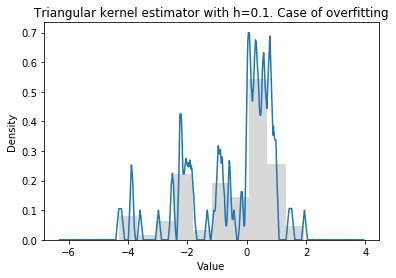

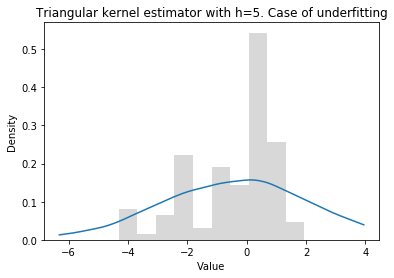

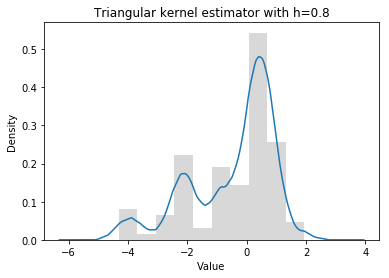

In [5]:
h = 0.1
f_tr_h = f_tr(grid_x)
plt.plot(np.transpose(grid_x), f_tr_h)
plt.title("Triangular kernel estimator with h=0.1. Case of overfitting")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3)
plt.show()
h = 5
f_tr_h = f_tr(grid_x)
plt.plot(np.transpose(grid_x), f_tr_h)
plt.title("Triangular kernel estimator with h=5. Case of underfitting")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3)
plt.show()
h = 0.8
f_tr_h = f_tr(grid_x)
plt.plot(np.transpose(grid_x), f_tr_h)
plt.title("Triangular kernel estimator with h=0.8")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3)
plt.show()

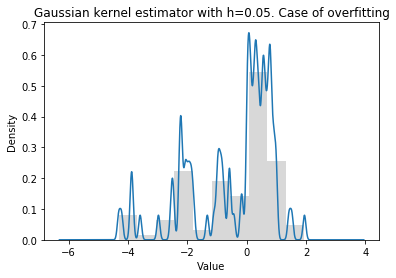

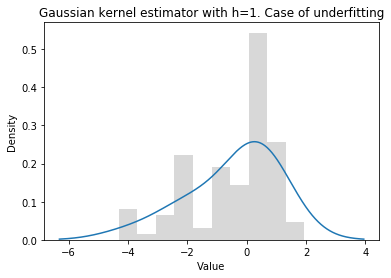

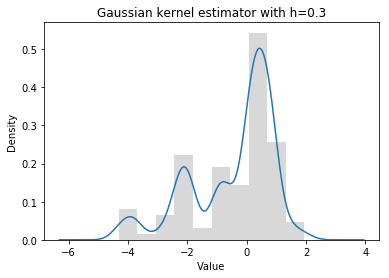

In [6]:
h = 0.05
f_gauss_res = f_gauss(grid_x)
plt.plot(np.transpose(grid_x), f_gauss_res)
plt.title("Gaussian kernel estimator with h=0.05. Case of overfitting")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3)
plt.show()
h = 1
f_gauss_res = f_gauss(grid_x)
plt.plot(np.transpose(grid_x), f_gauss_res)
plt.title("Gaussian kernel estimator with h=1. Case of underfitting")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3)
plt.show()
h = 0.3
f_gauss_res = f_gauss(grid_x)
plt.plot(np.transpose(grid_x), f_gauss_res)
plt.title("Gaussian kernel estimator with h=0.3")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3)
plt.show()

It look like we found some plausible values of tunning parameter $h$. Let us do it in a more systematic way.
<br>c. We wnat to build the __optimal__ estimator using __cross-validation__ technique. 
<br> It is optimal in the sense of bandwidth parameter selection which minimizes the unbiased MISE estimator, $ \hat{J}(h)$
$$\hat{J}(h)=\int \hat{f}_h^2(x)dx-2\hat{G}_h$$
where $\hat{G}_h=\frac{1}{n}\sum\limits_{i=1}^{n} \hat{f}_h^{-i}\big(X_{i}\big)$, and $\hat{f}_h^{-i}(x)=\frac{1}{(n-1)h}\sum\limits_{i\neq j} K\Big(\frac{X_{j}-x}{h}\Big)$.
<br> Hence, we created the grid of the $h$ values, calculated $\int \hat{f}_h^2(x)dx$ and $\hat{G}_h$ on this grid, and found the value that minimizes $\hat{J}(h)$. To put it in other way, we choose $\hat{h}^{CV}$:
$$\hat{h}^{CV}\triangleq \underset{h>0}{\mathrm{argmin}}  \hat{J}(h)$$
<br> To visualize the search of the optimal bandwidth, we plot $\hat{J}(h)$ as function of $h$.
Finally, we construct the optimal density estimator using $\hat{h}^{CV}$:
$$\hat{f}_{n,h^{CV}}(x)=\frac{1}{nh^{CV}}\sum\limits_{i=1}^{n} K\Big(\frac{X_i-x}{h^{CV}}\Big)$$
<br> _Remark_: We use integrate function from scipy package to calculate integral. We set integration bounds to min(X) and max(X) to stabilize computations (and we lose nothing, of course).

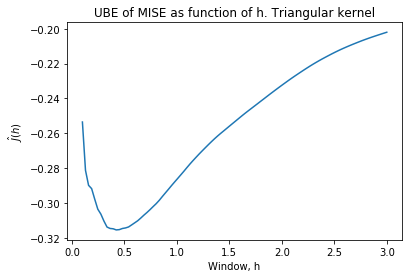

Optimal h for the estimator with triangular kernel: 0.422222222222


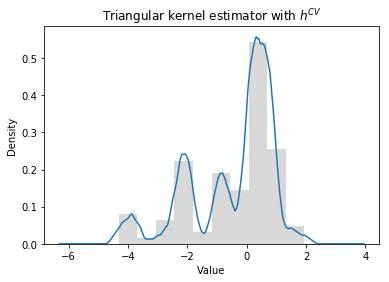

In [7]:
# Optimal estimator with triangular kernel
h_grid = np.linspace(0.1,3, num=10**2)
h_grid = h_grid.reshape((len(h_grid),1))
# Calculate integral of f^2 on the grid of h: int_tr_f2
from scipy import integrate
def f_tr2(x):
    K_tr = (1-np.abs((X - x)/h))*(np.abs((X - x)/h) < 1)
    return (1/(n*h)*np.sum(K_tr, axis = 0))**2
int_tr_f2 = np.zeros((len(h_grid),1))
for i in np.arange(len(h_grid)):
    h = h_grid[i,0]
    int_tr_f2[i,0]=integrate.quad(f_tr2, -np.inf, np.inf)[0]
# Calculate G_h on the grid of h: G_tr(h_grid)
f_tr_no_i = np.zeros((len(X),1))
def G_tr(h):
    for i in np.arange(len(X)):
        X_no_i = X[np.arange(len(X))!=i]
        K_tr_no_i = (1-np.abs((X_no_i - X[i, 0])/h))*(np.abs((X_no_i - X[i, 0])/h) < 1)
        f_tr_no_i[i, 0] = 1/((n-1)*h)*np.sum(K_tr_no_i, axis = 0)
    return(np.mean(f_tr_no_i))
G_tr = np.vectorize(G_tr)
J_tr_h = int_tr_f2 - 2*G_tr(h_grid)
plt.plot(h_grid,J_tr_h) # plot the J_tr_h function to see it behaves adequately
plt.title("UBE of MISE as function of h. Triangular kernel")
plt.xlabel("Window, h")
plt.ylabel("$\hat{J}(h)$")
plt.show()
h_tr_opt = h_grid[np.argmin(J_tr_h),0]
print("Optimal h for the estimator with triangular kernel: " + str(h_tr_opt))
# Build the estimator with optimal h
h = h_tr_opt
opt_f_tr_h = f_tr(grid_x)
plt.plot(np.transpose(grid_x), opt_f_tr_h)
plt.title("Triangular kernel estimator with $h^{CV}$")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3)
plt.show()

In [8]:
# Optimal estimator with gaussian kernel
h_grid = np.linspace(0.05,1,num=10**2)
h_grid = h_grid.reshape((len(h_grid),1))
# Calculate integral of f^2 on the grid of h: int_gauss_f2
def f_gauss2(x):
    K_gauss = (1/np.sqrt(2*np.pi))*(np.exp(-((X - x)/h)**2/2))
    return(1/(n*h)*np.sum(K_gauss, axis = 0))**2
from scipy import integrate
int_gauss_f2 = np.zeros((len(h_grid),1))
for i in np.arange(h_grid.shape[0]):
    h = h_grid[i,0]
    int_gauss_f2[i,0]=integrate.quad(f_gauss2, -np.inf, np.inf)[0]
# Calculate G_h on the grid of h: G_gauss(h_grid)
f_gauss_no_i = np.zeros((len(X),1))
def G_gauss(h):
    for i in np.arange(len(X)):
        X_no_i = X[np.arange(len(X))!=i]
        K_gauss_no_i = (1/np.sqrt(2*np.pi))*(np.exp(-((X_no_i - X[i, 0])/h)**2/2))
        f_gauss_no_i[i, 0] = 1/((n-1)*h)*np.sum(K_gauss_no_i, axis = 0)
    return(np.mean(f_gauss_no_i))
G_gauss = np.vectorize(G_gauss)
J_gauss_h = int_gauss_f2 - 2*G_gauss(h_grid)

The code for optimal estimator in the gaussian case is analagous. For the sake of parsimony, it is ommited in the report.
<br> The only difference: search of h is made on the grid [0.05, 1]. This is due to the high smoothness of the gaussian kernel.

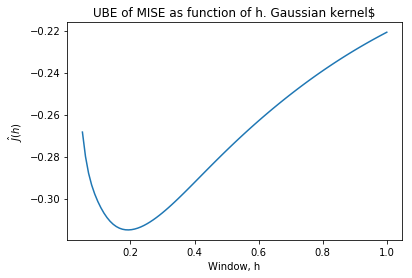

Optimal h for the estimator with gaussian kernel: 0.193939393939


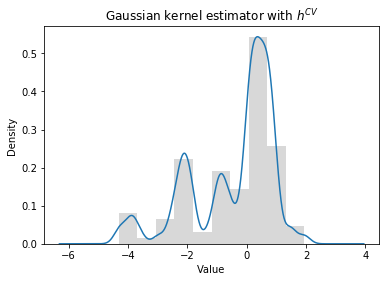

In [9]:
plt.plot(h_grid,J_gauss_h) # plot the J_gauss_h function to see it behaves adequately
plt.title("UBE of MISE as function of h. Gaussian kernel$")
plt.xlabel("Window, h")
plt.ylabel("$\hat{J}(h)$")
plt.show()
h_gauss_opt = h_grid[np.argmin(J_gauss_h),0]
print("Optimal h for the estimator with gaussian kernel: "+str(h_gauss_opt))
# Build the estimator with optimal h
h = h_gauss_opt
f_gauss_res = f_gauss(grid_x)
f_gauss_res = f_gauss_res.reshape((grid_x.shape[1],1))
plt.plot(np.transpose(grid_x), f_gauss_res)
plt.title("Gaussian kernel estimator with $h^{CV}$")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3)
plt.show()

The obtained optimal estimators look plausible, but, in our humble opinion, a bit overfitted. 
Therefore, we want to make some sanity check.
<br> We calculate the best bandwidth parameter using sklearn package. Unfortunately, it is not available for triangular kernel.

In [12]:
# Implementation by sklearn
from sklearn.neighbors import KernelDensity
#from scipy.stats import gaussian_kde
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': np.linspace(0.05, 1, 100)},
                    cv=100) 
grid.fit(X)
print(grid.best_params_)

{'bandwidth': 0.23232323232323232}


As we see, indeed, we got a bit lower value of optimal h. There can be various explanations for this. 
<br> First, probably sklearn uses AMISE as statistics to be optimized, or more points in the grid search are used, etc.

#### Exercise 2. Real data
Now, we exploit the methodology proposed above to estimating the distribution law of the real-world data.
<br> We have chosen data on __women's shoes prices__ publically available at Kaggle data repository https://www.kaggle.com/datafiniti/womens-shoes-prices.
<br> The whole dataset comprises 10,000 women's shoes and their associated information. 
<br> In order to fascilitate and accelerate implementation, we drawed a random subsample of 100 shoes prices to work with.
Hence, we assume that our sample __X__ consists of 100 i.i.d realizations of a random variable $ X $,the women's shoes prices, and we want to estimate its density.
<br> We first plot the histogram of __X__.

<br>_Remark_: We want to empasize that we would have used all the 10,000 observations as our sample __X__, had we more computational power. However, 100 observations will prove to be enough to estimate _X's_ law, as the analysis below shows.

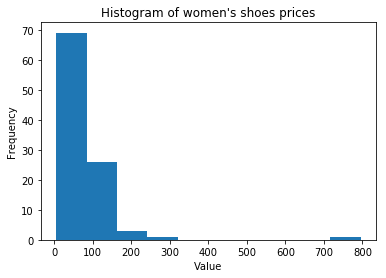

Skeweness: 6.070775443202115


In [13]:
X = np.loadtxt("ShoesPrices.csv")
plt.hist(X)
plt.title("Histogram of women's shoes prices")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
from scipy import stats 
print("Skeweness: "+str(stats.skew(X)))

As we see, the prices of women's shoes are positively skewed. It's intuitive: most of shoes are not that expensive, but Louboutin exists in this world.
We suggest that this data follow lognormal distribution, but, actually, the random variable "women's shoes price" has an unknown law. 
Let's have some fun and build the optimal estimators.
<br> For the sake of diversity, let's try non-smooth rectangular $\big(K(u) = \frac{1}{2}\mathbb{1} \{|u\leq 1|\}\big)$ and nice and smooth gaussian kernel.

In [14]:
# Data preparation
X = X.reshape((len(X), 1))
grid_x = np.linspace(np.min(X), np.max(X), num = 10**4)
grid_x = grid_x.reshape((1, len(grid_x)))
n = len(X)

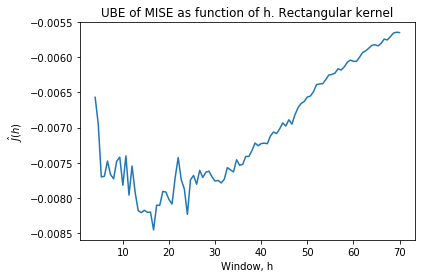

H optimal for the estimator with rectangular kernel is 16.6666666667


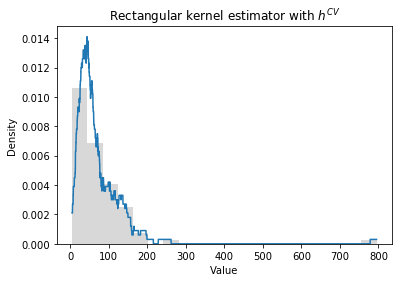

In [30]:
# Optimal estimator with rectangular kernel
h_grid = np.linspace(4,70, num=10**2)
h_grid = h_grid.reshape((len(h_grid),1))
def f_rect2(x):
    K_rect = 0.5*(np.abs((X - x)/h) < 1)
    return (1/(n*h)*np.sum(K_rect, axis = 0))**2
int_f2 = np.zeros((len(h_grid),1))
for i in np.arange(h_grid.shape[0]):
    h = h_grid[i,0]
    int_f2[i,0]=integrate.quad(f_rect2, -np.inf, np.inf)[0]
f_rect_no_i = np.zeros((len(X),1))
def G(h):
    for i in np.arange(len(X)):
        X_no_i = X[np.arange(len(X))!=i]
        K_rect_no_i = 0.5*(np.abs((X_no_i - X[i, 0])/h) < 1)
        f_rect_no_i[i, 0] = 1/((n-1)*h)*np.sum(K_rect_no_i, axis = 0)
    return(np.mean(f_rect_no_i))
G = np.vectorize(G)
J_h = int_f2 - 2*G(h_grid)
plt.plot(h_grid,J_h)
plt.title("UBE of MISE as function of h. Rectangular kernel")
plt.xlabel("Window, h")
plt.ylabel("$\hat{J}(h)$")
plt.show()
h_opt = h_grid[np.argmin(J_h),0]
print("H optimal for the estimator with rectangular kernel is " + str(h_opt))
h=h_opt
def f_rect(x):
    K_rect = 0.5*(np.abs((X - x)/h) < 1)
    return 1/(n*h)*np.sum(K_rect, axis = 0)
f_rect_res = f_rect(grid_x)
plt.plot(np.transpose(grid_x), f_rect_res)
plt.title("Rectangular kernel estimator with $h^{CV}$")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3,bins=20)
plt.show()

We see that $\hat{J}(h)$ is very oscillating. It is the price we pay for simplicity and non-smoothness of the rectangular kernel estimator. However, the result is more or less acceptable. Some overfitting might be present.

In [28]:
# Noyau gaussien
h_grid = np.linspace(1,50,num=10**2)
h_grid = h_grid.reshape((len(h_grid),1))
# Calculate integral of f^2 on the grid of h: int_gauss_f2
int_gauss_f2 = np.zeros((len(h_grid),1))
for i in np.arange(h_grid.shape[0]):
    h = h_grid[i,0]
    int_gauss_f2[i,0]=integrate.quad(f_gauss2, -np.inf, np.inf)[0]
f_gauss_no_i = np.zeros((len(X),1))
J_gauss_h = int_gauss_f2 - 2*G_gauss(h_grid)

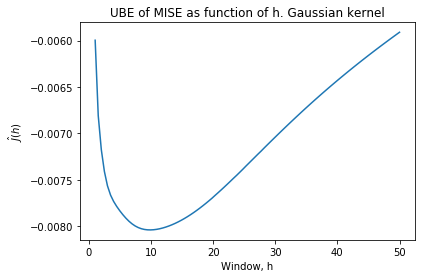

H optimal for the estimator with gaussian kernel is 9.90909090909


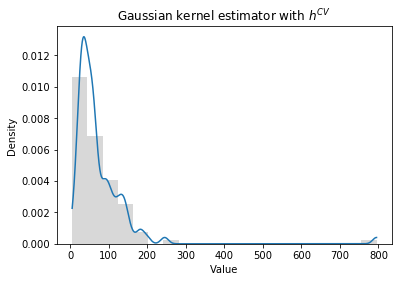

In [29]:
plt.plot(h_grid,J_gauss_h)
plt.title("UBE of MISE as function of h. Gaussian kernel")
plt.xlabel("Window, h")
plt.ylabel("$\hat{J}(h)$")
plt.show()
h_gauss_opt = h_grid[np.argmin(J_gauss_h),0]
print("H optimal for the estimator with gaussian kernel is "+str(h_gauss_opt))
h = h_gauss_opt
f_gauss_res = f_gauss(grid_x)
f_gauss_res = f_gauss_res.reshape((grid_x.shape[1],1))
plt.plot(np.transpose(grid_x), f_gauss_res)
plt.title("Gaussian kernel estimator with $h^{CV}$")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(X, normed=1,facecolor='grey',alpha=0.3,bins=20)
plt.show()

This plot is the best thing that happened to me this evening.
The selected bandwidth looks to be optimal indeed.